# Car Spare Parts Data Analysis

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets from csv file

df = pd.read_csv("../DATA/spare_parts_expanded.csv")
df.head()

,spare_parts,quantity,costs,sale_price,date,total_revenue
0,Wheel,24,30,53,1 01 2020,"$1,272"
1,Tyre,20,80,110,2 01 2020,"$2,200"
2,Battery,46,85,95,3 01 2020,"$4,370"
3,Air Filter,37,36,48,4 01 2020,"$1,776"
4,Oil Filter,28,96,120,5 01 2020,"$3,360"


In [3]:
# Check dtype of date and revenue column
df[['date','total_revenue','sale_price']].dtypes

date             object
total_revenue    object
sale_price        int64
dtype: object

In [4]:
# Check for duplicates in spare parts column
df['sale_price'].duplicated().sum()

10

In [5]:
# Clean up dataset
df['total_revenue'] = df['total_revenue'].replace(",","",regex=True)
df['total_revenue'] = df['total_revenue'].str.replace("$","").astype(int)

# Date column
df['date'] = pd.to_datetime(df['date'])

df.head()

,spare_parts,quantity,costs,sale_price,date,total_revenue
0,Wheel,24,30,53,2020-01-01,1272
1,Tyre,20,80,110,2020-02-01,2200
2,Battery,46,85,95,2020-03-01,4370
3,Air Filter,37,36,48,2020-04-01,1776
4,Oil Filter,28,96,120,2020-05-01,3360


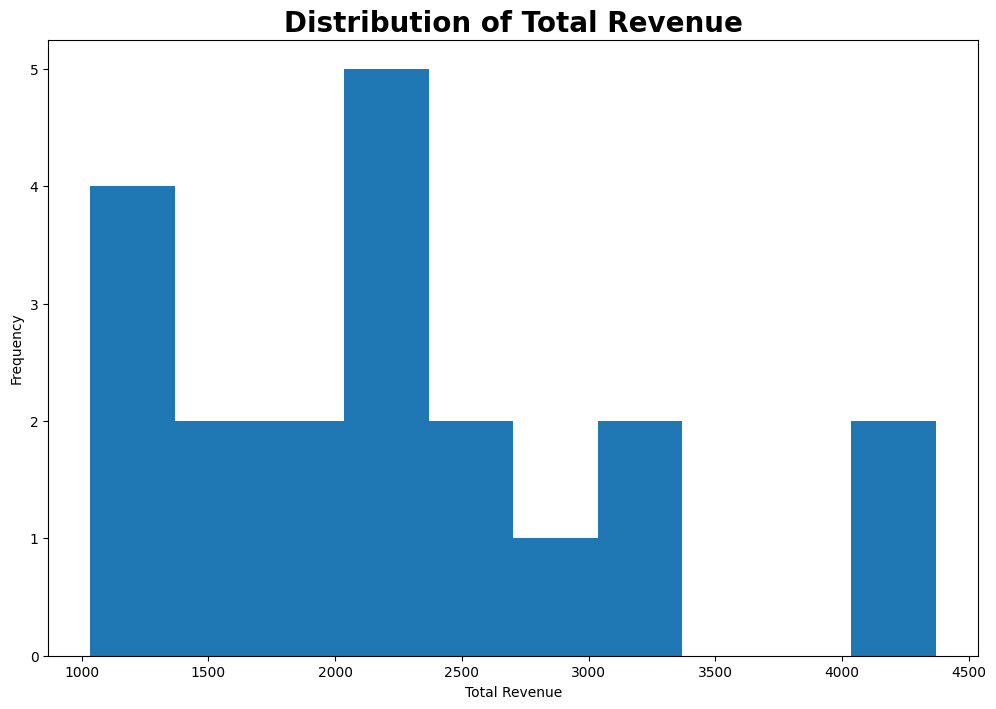

In [6]:
# Distribution of sales

fig,ax = plt.subplots(figsize=(12,8))
ax.hist(df['total_revenue'],bins=10)
ax.set(xlabel='Total Revenue', ylabel='Frequency')
plt.title(label="Distribution of Total Revenue",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

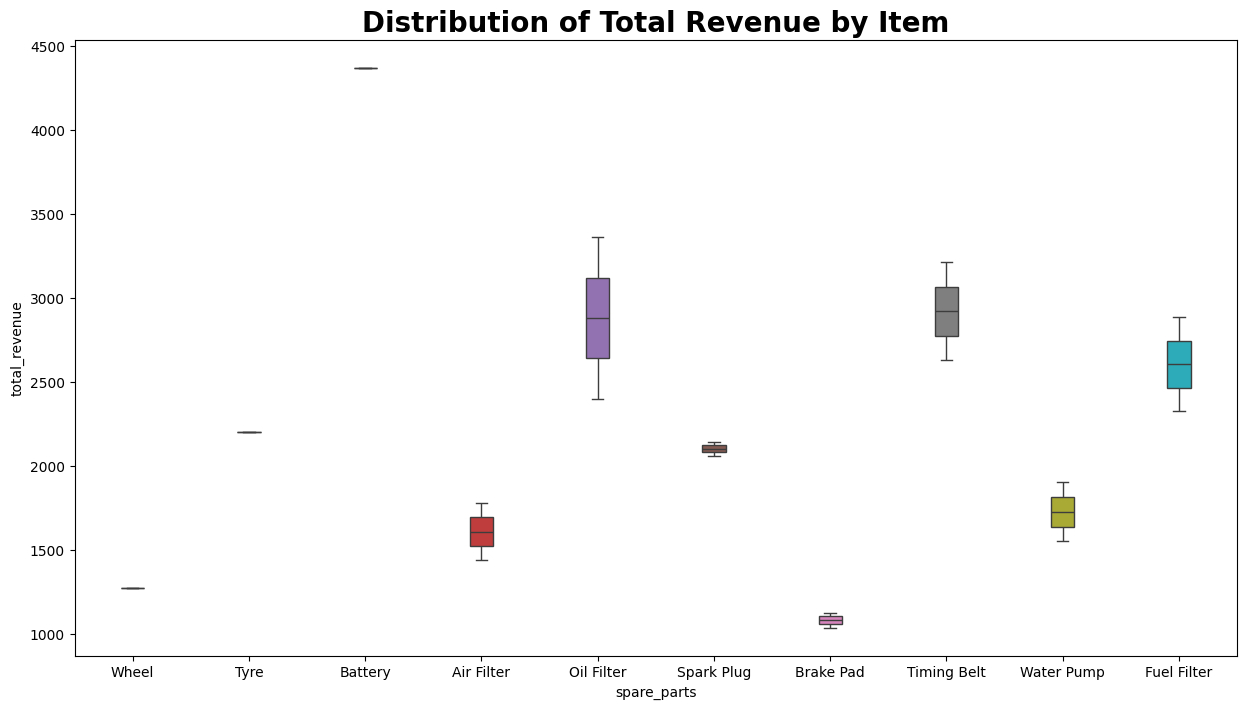

In [7]:
# Box plot
fig,ax = plt.subplots(figsize=(15,8))
sns.boxplot(x='spare_parts', y='total_revenue',data=df,
            ax=ax,hue='spare_parts',
            width=0.2,
            linewidth=1.0)
plt.title(label="Distribution of Total Revenue by Item",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

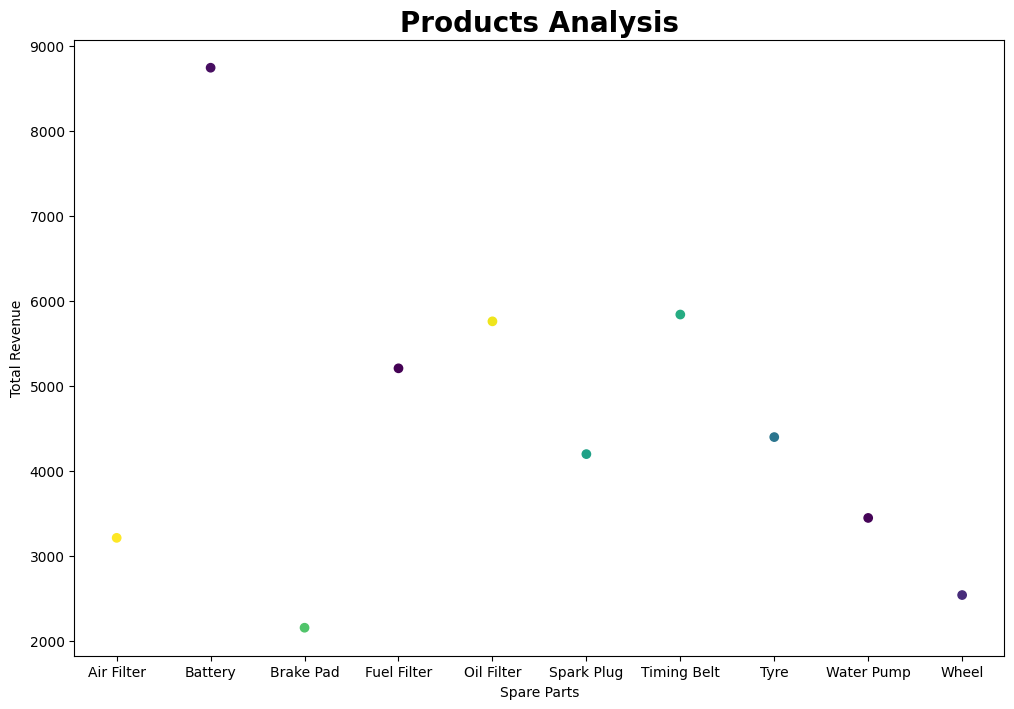

In [8]:
# Scatter plot of total revenue and sale price

# Group dataset by spare parts
df_grouped = df.groupby(by='spare_parts')['total_revenue'].sum()
colors = np.random.rand(10)

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(x=df_grouped.index,y=df_grouped,
           c=colors,alpha=1.0)
ax.set(xlabel='Spare Parts',ylabel='Total Revenue')
plt.title(label="Products Analysis",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

In [9]:
# Integer column subset of df
df2 = df.select_dtypes(include='int') 
df2.head()

,quantity,costs,sale_price,total_revenue
0,24,30,53,1272
1,20,80,110,2200
2,46,85,95,4370
3,37,36,48,1776
4,28,96,120,3360


In [10]:
# Most and least profitable products

# Compute profit
df['total_cost'] = df['costs'] * df['quantity']
df['profit'] = df['total_revenue'] - df['total_cost']

# Group data by products
grouped_df = df.groupby(by='spare_parts')[['profit']].sum()

# Most profitable product
most_profit_sparts = grouped_df.loc[:, 'profit'].idxmax()

# Least profitable product
least_profit_sparts = grouped_df.loc[:, 'profit'].idxmin()

print(f"The most profitable product is {most_profit_sparts}")
print(f"The least profitable product is {least_profit_sparts}")

The most profitable product is Timing Belt
The least profitable product is Air Filter


In [11]:
# Amount of most profitable product
most_profit_sparts_amount = grouped_df.loc[grouped_df['profit'].idxmax()]

# Amount of least profitable product
least_profit_sparts_amount = grouped_df.loc[grouped_df['profit'].idxmin()]

diff_in_profit = most_profit_sparts_amount - least_profit_sparts_amount
print(f"The difference in profit between the least and the most profitable products is {diff_in_profit.loc['profit']}")
# diff_in_profit

The difference in profit between the least and the most profitable products is 1556


In [12]:
# Compute sum profit
total_profit = df['profit'].sum()

# Check least profit
least_profit = df['profit'].min()

# Compute percentage drop
percent_drop = (least_profit/total_profit)*100
print(f"The drop in profit is {percent_drop:.2f}%")

The drop in profit is 2.58%


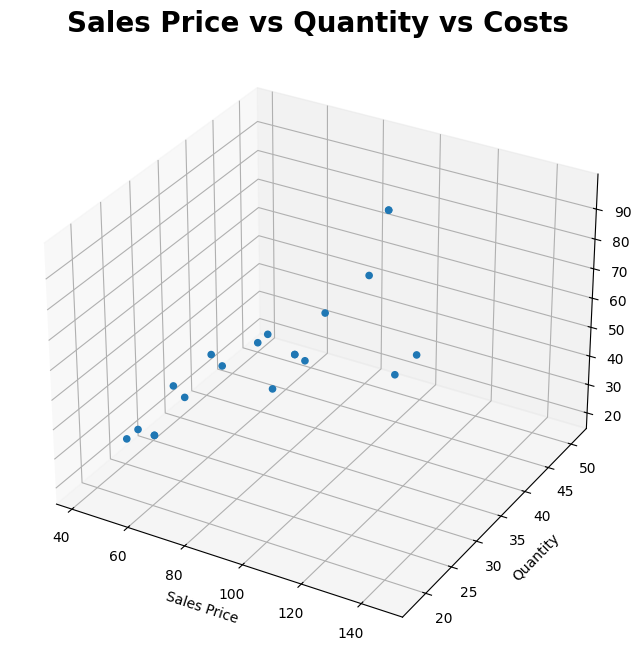

In [13]:
# 3D plot
fig =plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['sale_price'],
           df['quantity'],
           df['costs'],
           alpha=1.0)
ax.set(xlabel='Sales Price', ylabel='Quantity',zlabel='Costs')
plt.title(label="Sales Price vs Quantity vs Costs",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

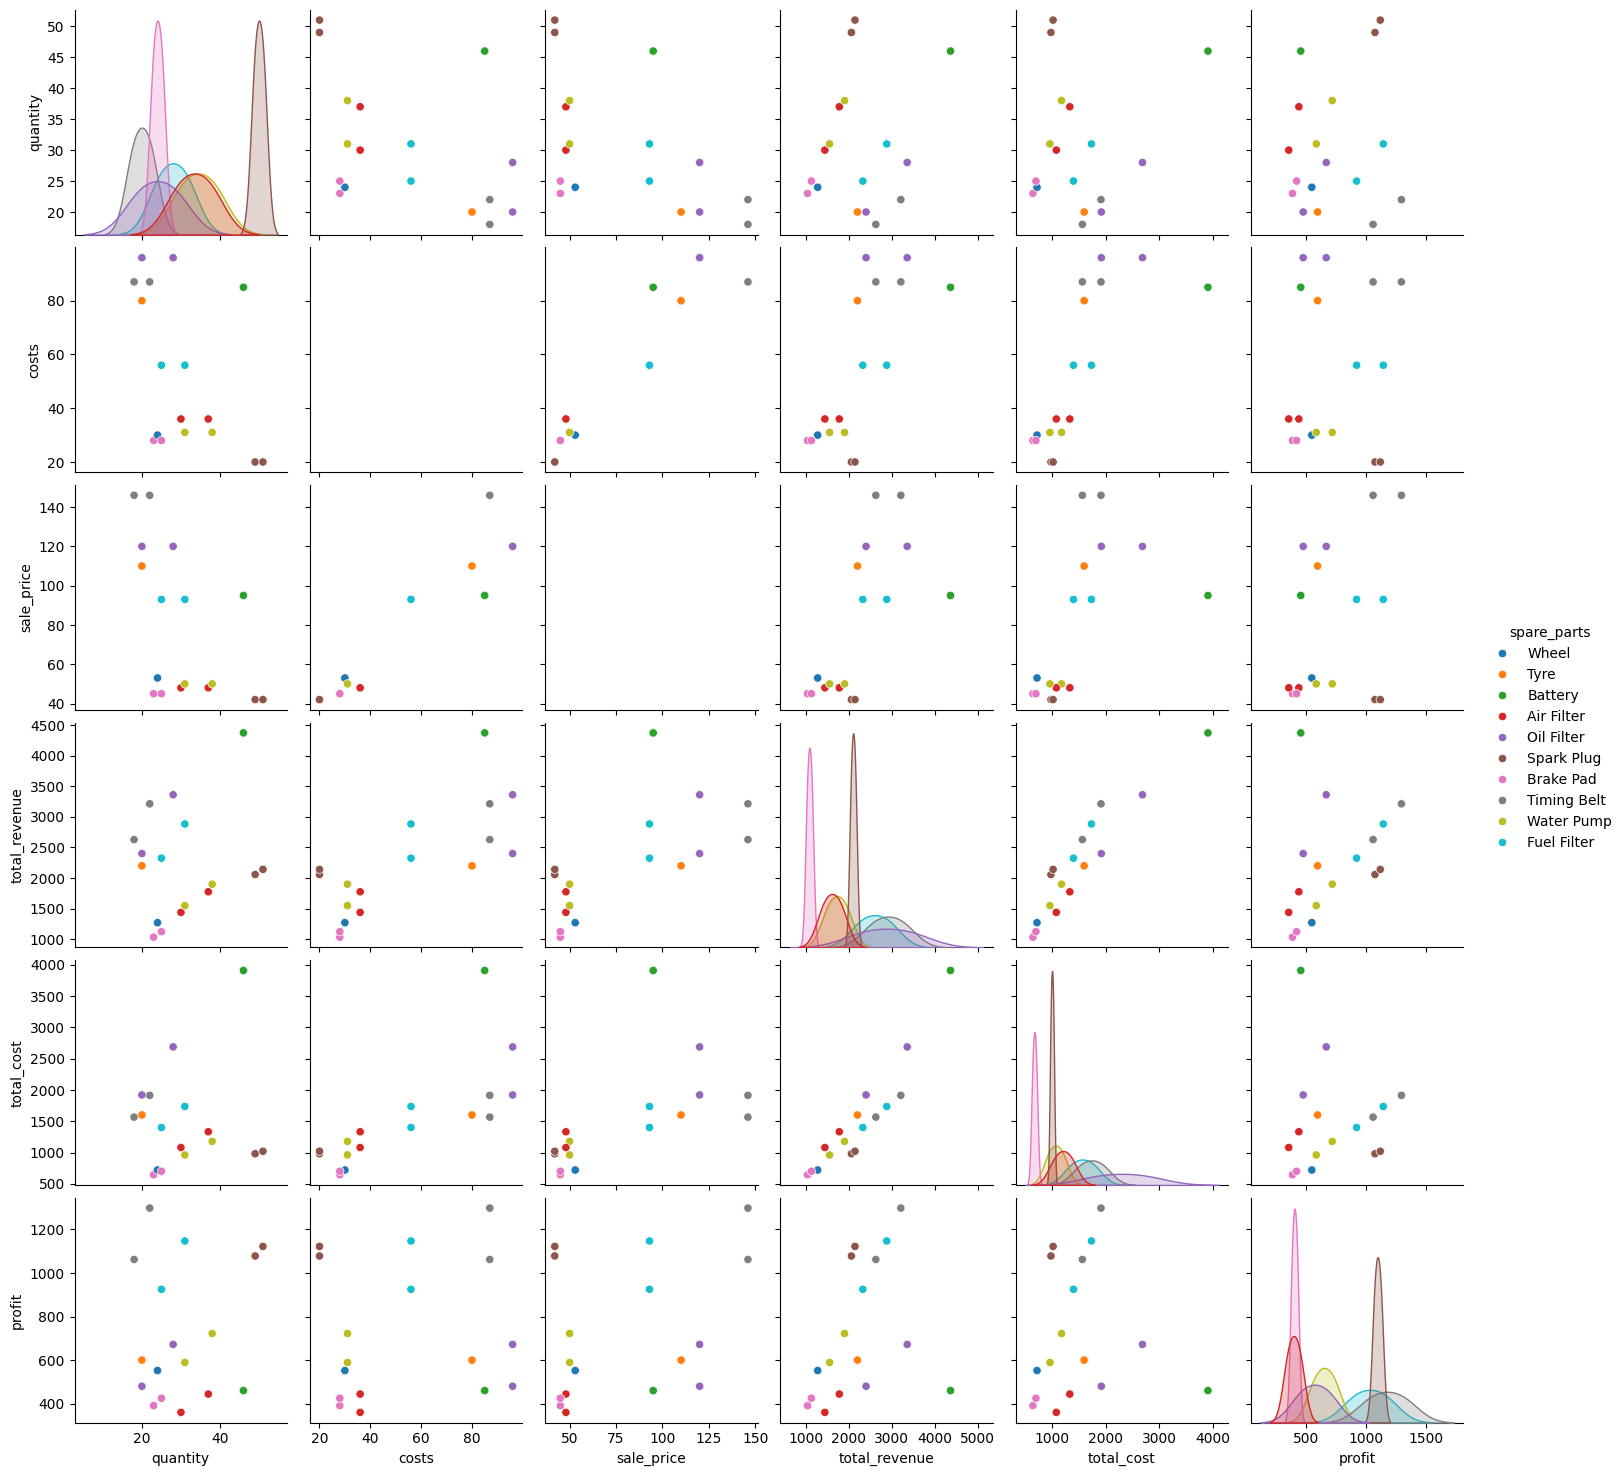

In [14]:
# Pair plot of df
# fig,ax = plt.subplots(figsize=(12,8))
sns.pairplot(df,hue='spare_parts')
plt.show()

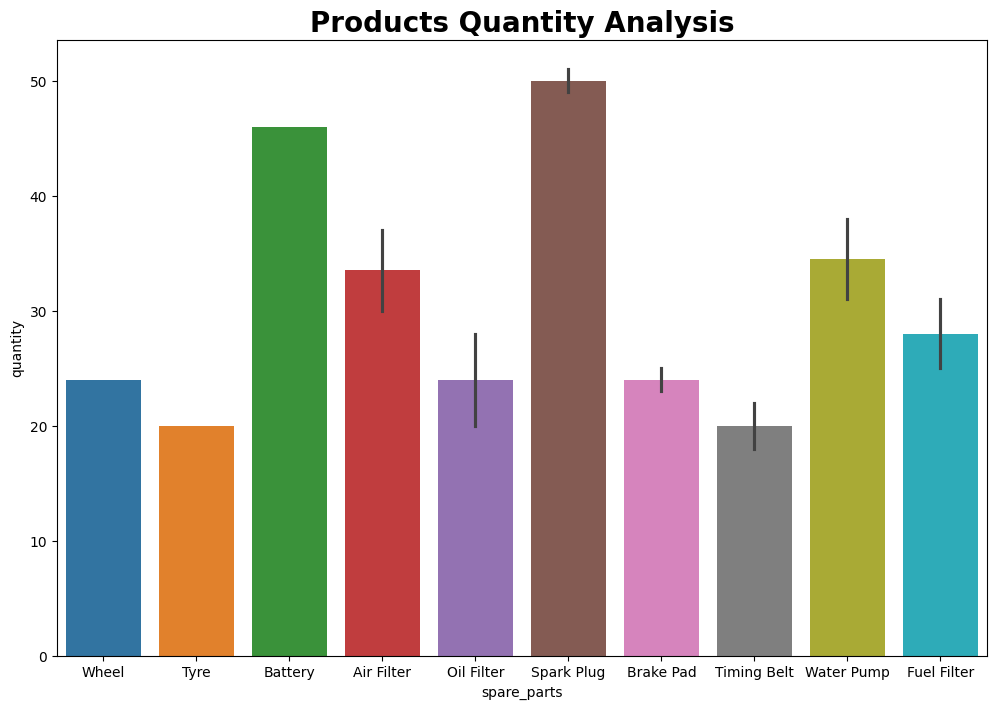

In [15]:
# Bar plot of products
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x='spare_parts',y='quantity',data=df,
            hue='spare_parts',ax=ax
            )
plt.title(label="Products Quantity Analysis",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

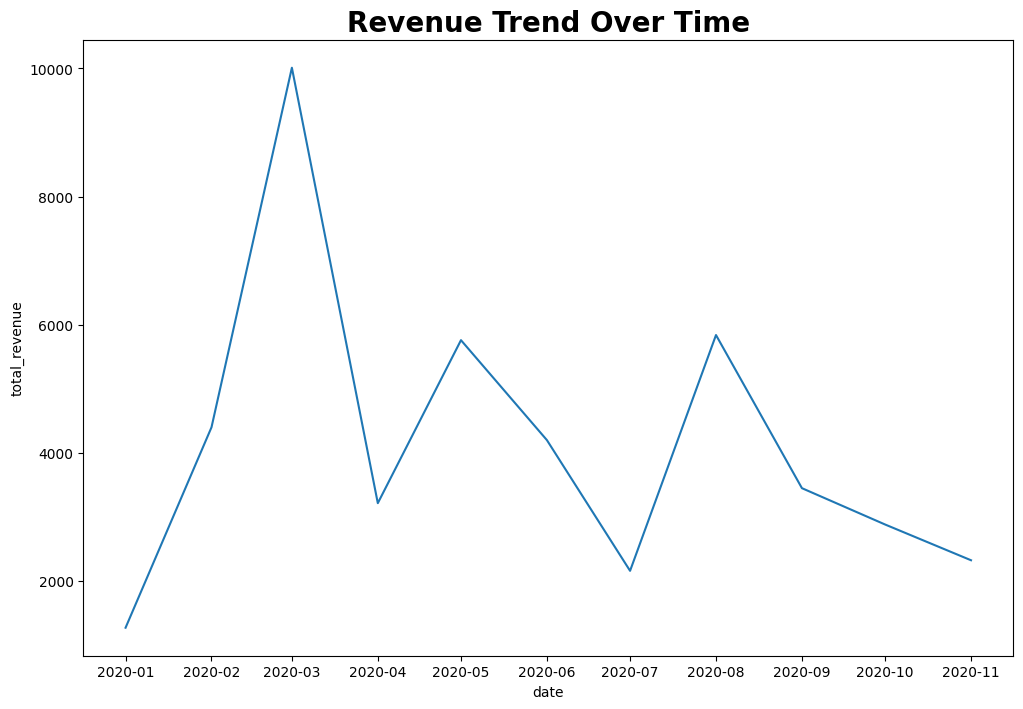

In [16]:
# Line plot of total sales over time

# Group df by date
grouped_df = df.groupby(by='date')['total_revenue'].sum()
# grouped_df = grouped_df.to_frame

fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=grouped_df.index,
             y=grouped_df,
            #  data=grouped_df,
             ax=ax)
plt.title(label="Revenue Trend Over Time",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

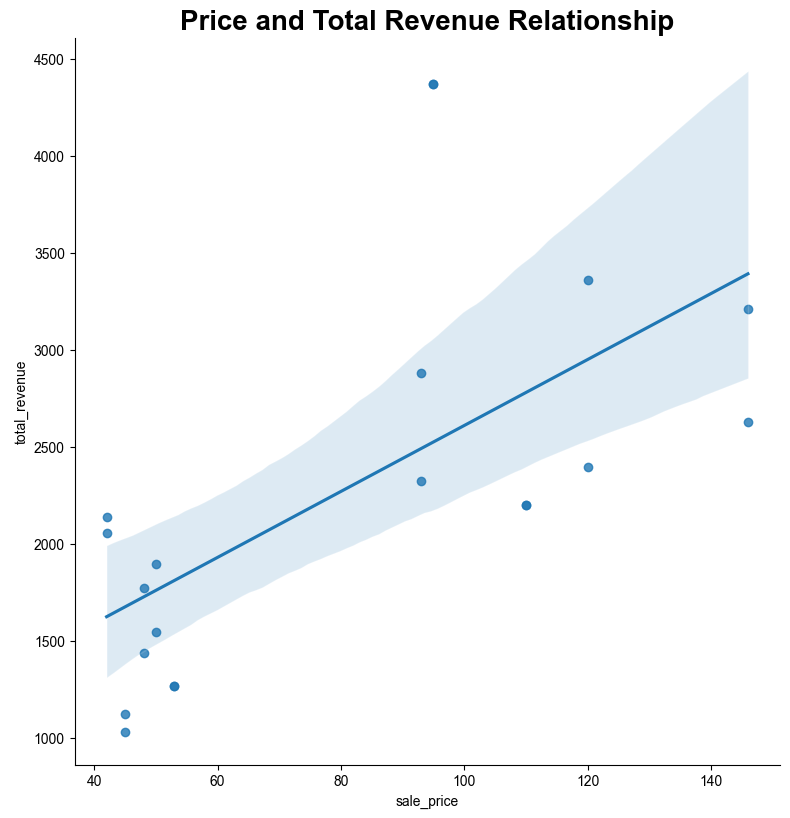

In [17]:
# Lmplot sales price and total revenue
# fig,ax = plt.subplots(figsize=(12,8))
sns.lmplot(x='sale_price',y='total_revenue',data=df,
           fit_reg=True, height=8
           )
sns.set_style('whitegrid',{'axes.grid':False})
plt.title(label="Price and Total Revenue Relationship",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()